### Using Maths to classify Excercise


In [ ]:
#added changes to the comment for branch

In [1]:
#Ignoriung Warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
#importing libs
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

2024-08-06 11:58:44.032818: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Calculating Angles:

def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

def calculate_distance(a, b):
    """Euclidean distance between two points a and b."""
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

<img src="https://i.imgur.com/3j8BPdc.png" style="height:300px" >

In [4]:
import math

In [5]:
def extract_features(landmarks):
    features = []
    
    # Extract key landmarks
    shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
             landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
    wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
             landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
    hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
           landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
            landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
    ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
             landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
    shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                      landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
    hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                 landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    
    #angles
    shoulder_elbow_wrist_angle = calculate_angle(shoulder, elbow, wrist)
    hip_knee_ankle_angle = calculate_angle(hip, knee, ankle)
    shoulder_hip_knee_angle = calculate_angle(shoulder, hip, knee)
    elbow_shoulder_hip_angle = calculate_angle(elbow, shoulder, hip)
    knee_hip_shoulder_angle = calculate_angle(knee, hip, shoulder_right)
    shoulder_right_hip_right_knee_angle = calculate_angle(shoulder_right, hip_right, knee)

    #distances
    shoulder_elbow_distance = calculate_distance(shoulder, elbow)
    elbow_wrist_distance = calculate_distance(elbow, wrist)
    hip_knee_distance = calculate_distance(hip, knee)
    knee_ankle_distance = calculate_distance(knee, ankle)
    shoulder_hip_distance = calculate_distance(shoulder, hip)
    shoulder_right_hip_right_distance = calculate_distance(shoulder_right, hip_right)

    # Add features to the list
    features.extend([
        shoulder_elbow_wrist_angle, hip_knee_ankle_angle,
        shoulder_hip_knee_angle, elbow_shoulder_hip_angle,
        knee_hip_shoulder_angle, shoulder_right_hip_right_knee_angle,
        shoulder_elbow_distance, elbow_wrist_distance,
        hip_knee_distance, knee_ankle_distance,
        shoulder_hip_distance, shoulder_right_hip_right_distance
    ])
    return features


def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    all_features = []
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
            # cv2.imshow(image)
            

            results = pose.process(image)
            if results.pose_landmarks:
                # Extract features from the landmarks
                features = extract_features(results.pose_landmarks.landmark)
                all_features.append(features)
        
        cap.release()
    
    all_features = np.array(all_features)
    # Aggregate the features 
    # feature_vector = np.concatenate([np.mean(all_features, axis=0),
    #                                  np.std(all_features, axis=0),
    #                                  np.max(all_features, axis=0),
    #                                  np.min(all_features, axis=0)])
    
    return feature_vector

# Squats usage
video_path = 'right.mp4'
feature_vector = process_video(video_path)
# print("Feature Vector:", feature_vector)
feature_vector


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


NameError: name 'feature_vector' is not defined

In [56]:
# Bicep curls
arr=[]
video_path = 'Dumbels/1.mp4'
feature_vector = process_video(video_path)
# print("Feature Vector:", feature_vector)
arr.append(feature_vector)

In [49]:
arr

[array([146.02434122, 175.73179589,  36.5144788 ,   8.14600576,
        177.25792714, 179.9981058 ,  40.85908483, 105.50753579])]

In [57]:
video_path = 'Dumbels/2.mp4'
feature_vector = process_video(video_path)
# print("Feature Vector:", feature_vector)
arr.append(feature_vector)

In [58]:
video_path = 'Dumbels/3.mp4'
feature_vector = process_video(video_path)
# print("Feature Vector:", feature_vector)
arr.append(feature_vector)

In [59]:
video_path = 'Dumbels/4.mp4'
feature_vector = process_video(video_path)
# print("Feature Vector:", feature_vector)
arr.append(feature_vector)

In [60]:
video_path = 'Dumbels/dumbel.mp4'
feature_vector = process_video(video_path)
# print("Feature Vector:", feature_vector)
arr.append(feature_vector)

In [61]:
# for squats
arr1=[]

In [62]:
video_path = 'right.mp4'
feature_vector = process_video(video_path)
# print("Feature Vector:", feature_vector)
arr1.append(feature_vector)
video_path = 'wrong.mp4'
feature_vector = process_video(video_path)
# print("Feature Vector:", feature_vector)
arr1.append(feature_vector)

arr1.append(feature_vector)
video_path = 'r_squats.mp4'
feature_vector = process_video(video_path)
# print("Feature Vector:", feature_vector)
arr1.append(feature_vector)
video_path = 'r_squat.mp4'
feature_vector = process_video(video_path)
# print("Feature Vector:", feature_vector)
arr1.append(feature_vector)

In [63]:
arr1

[array([9.23798490e+01, 1.66675842e+02, 1.63923578e+02, 4.81710834e+01,
        1.63820251e+02, 1.63193945e+02, 7.93713425e-02, 4.67010389e-02,
        1.24633367e-01, 1.41194451e-01, 1.77094499e-01, 1.67038714e-01,
        3.52292608e+01, 2.77021795e+01, 3.13810888e+01, 3.64629493e+01,
        3.06366629e+01, 2.50132050e+01, 1.89264466e-02, 2.49045206e-02,
        1.69025790e-02, 2.94376031e-03, 8.40919711e-03, 1.06354594e-02,
        1.62913101e+02, 1.79976193e+02, 1.79997501e+02, 1.36274635e+02,
        1.79928853e+02, 1.79603312e+02, 1.12609969e-01, 8.62445950e-02,
        1.41953559e-01, 1.49858810e-01, 1.91014938e-01, 1.80537156e-01,
        2.61243554e+00, 5.05279736e+01, 3.82280399e+01, 1.43032790e+00,
        3.90201074e+01, 5.30480934e+01, 4.53912018e-02, 1.69153529e-03,
        7.05511436e-02, 1.29290409e-01, 1.49893025e-01, 1.32246909e-01]),
 array([9.86993599e+01, 1.67604553e+02, 1.58691651e+02, 3.97194464e+01,
        1.56309801e+02, 1.60792882e+02, 6.67007847e-02, 5.1581

In [64]:
arr

[array([1.46024341e+02, 1.75731796e+02, 1.64232890e+02, 2.40385437e+01,
        1.39669020e+02, 1.55204804e+02, 1.36054693e-01, 1.13260336e-01,
        1.80601924e-01, 1.59690804e-01, 2.52158177e-01, 2.69251371e-01,
        3.65144788e+01, 8.14600576e+00, 6.68997370e+00, 7.74123229e+00,
        5.70799114e+00, 3.92259457e+00, 1.11153433e-02, 2.29063249e-02,
        1.42973208e-02, 1.02520226e-02, 1.18236609e-02, 1.34484784e-02,
        1.77257927e+02, 1.79998106e+02, 1.79975972e+02, 4.32147957e+01,
        1.58404108e+02, 1.68557712e+02, 1.61228549e-01, 1.80613251e-01,
        2.51630514e-01, 1.82955408e-01, 2.81983622e-01, 3.04790278e-01,
        4.08590848e+01, 1.05507536e+02, 1.45509609e+02, 8.63314076e+00,
        1.18678882e+02, 1.46878040e+02, 1.11360164e-01, 5.69554344e-02,
        1.56026573e-01, 1.29984977e-01, 2.27883283e-01, 2.38208628e-01]),
 array([1.08939723e+02, 1.70920209e+02, 1.62697142e+02, 1.50913875e+01,
        1.41151761e+02, 1.52943116e+02, 9.70071335e-02, 8.5279

In [65]:
arr.extend(arr1)


In [89]:
arr

[array([1.46024341e+02, 1.75731796e+02, 1.64232890e+02, 2.40385437e+01,
        1.39669020e+02, 1.55204804e+02, 1.36054693e-01, 1.13260336e-01,
        1.80601924e-01, 1.59690804e-01, 2.52158177e-01, 2.69251371e-01,
        3.65144788e+01, 8.14600576e+00, 6.68997370e+00, 7.74123229e+00,
        5.70799114e+00, 3.92259457e+00, 1.11153433e-02, 2.29063249e-02,
        1.42973208e-02, 1.02520226e-02, 1.18236609e-02, 1.34484784e-02,
        1.77257927e+02, 1.79998106e+02, 1.79975972e+02, 4.32147957e+01,
        1.58404108e+02, 1.68557712e+02, 1.61228549e-01, 1.80613251e-01,
        2.51630514e-01, 1.82955408e-01, 2.81983622e-01, 3.04790278e-01,
        4.08590848e+01, 1.05507536e+02, 1.45509609e+02, 8.63314076e+00,
        1.18678882e+02, 1.46878040e+02, 1.11360164e-01, 5.69554344e-02,
        1.56026573e-01, 1.29984977e-01, 2.27883283e-01, 2.38208628e-01]),
 array([1.08939723e+02, 1.70920209e+02, 1.62697142e+02, 1.50913875e+01,
        1.41151761e+02, 1.52943116e+02, 9.70071335e-02, 8.5279

In [104]:
import pandas as pd
df = pd.DataFrame(arr)

# Display the DataFrame
print(df)

           0           1           2          3           4           5   \
0  146.024341  175.731796  164.232890  24.038544  139.669020  155.204804   
1  108.939723  170.920209  162.697142  15.091387  141.151761  152.943116   
2  135.910355  175.117729  170.753392  10.216002  138.088883  156.976350   
3   79.523484  162.718048  174.681622  27.329542  141.892198  157.454671   
4   95.845127  179.182792  178.299412  11.670544  161.963162  171.572387   
5   92.379849  166.675842  163.923578  48.171083  163.820251  163.193945   
6   98.699360  167.604553  158.691651  39.719446  156.309801  160.792882   
7   98.699360  167.604553  158.691651  39.719446  156.309801  160.792882   
8  128.732285  152.200329  155.258948  33.913771  151.247475  161.621250   
9  128.745574  149.691819  152.483858  34.126612  148.379275  160.149210   

         6         7         8         9   ...          38         39  \
0  0.136055  0.113260  0.180602  0.159691  ...  145.509609   8.633141   
1  0.097007  0.08

            0           1           2          3           4           5  \
0  146.024341  175.731796  164.232890  24.038544  139.669020  155.204804   
1  108.939723  170.920209  162.697142  15.091387  141.151761  152.943116   
2  135.910355  175.117729  170.753392  10.216002  138.088883  156.976350   
3   79.523484  162.718048  174.681622  27.329542  141.892198  157.454671   
4   95.845127  179.182792  178.299412  11.670544  161.963162  171.572387   
5   92.379849  166.675842  163.923578  48.171083  163.820251  163.193945   
6   98.699360  167.604553  158.691651  39.719446  156.309801  160.792882   
7   98.699360  167.604553  158.691651  39.719446  156.309801  160.792882   
8  128.732285  152.200329  155.258948  33.913771  151.247475  161.621250   
9  128.745574  149.691819  152.483858  34.126612  148.379275  160.149210   

          6         7         8         9  ...         39          40  \
0  0.136055  0.113260  0.180602  0.159691  ...   8.633141  118.678882   
1  0.097007  0.08

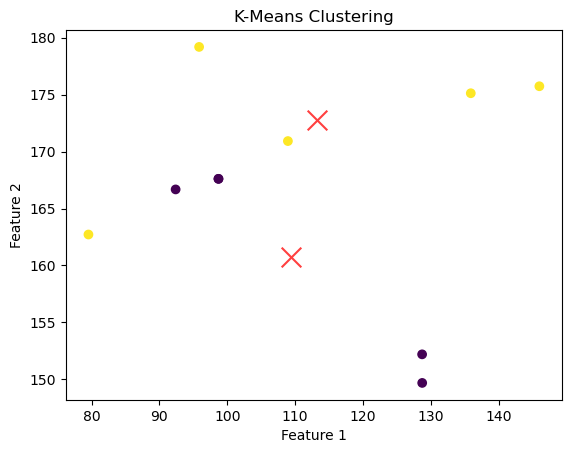

In [105]:
num_clusters = 2  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_

centers = kmeans.cluster_centers_
print(df)

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')  # Cluster centers
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()# Optional: Plotting (useful for visualizing in 2D or 3D

In [97]:
video_path = 'test_squat.mp4'
features_df= pd.DataFrame(process_video(video_path))
test_data_point = features_df.T.reset_index(drop=True)
test_data_point

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,42.305703,98.322964,90.291081,24.193173,88.868053,101.14757,0.078565,0.072488,0.263668,0.210079,...,39.711329,0.019034,37.027492,46.449826,0.010827,0.013055,0.202799,0.185408,0.247829,0.238248


In [98]:
cluster_label = kmeans.predict(test_data_point)
print("Predicted cluster for the test data point:", cluster_label)

Predicted cluster for the test data point: [0]


In [110]:
import h5py
import numpy as np

# Assuming 'kmeans' is your fitted KMeans model and 'df' is your DataFrame

# Save the model
with h5py.File('kmeans_model.h5', 'w') as f:
    f.create_dataset('centers', data=kmeans.cluster_centers_)
    f.create_dataset('labels', data=kmeans.labels_)



In [111]:
# Load the model (for verification or future use)
with h5py.File('kmeans_model.h5', 'r') as f:
    centers = f['centers'][:]
    labels = f['labels'][:]

print("Cluster centers:\n", centers)
print("Labels:\n", labels)


Cluster centers:
 [[1.09451286e+02 1.60755419e+02 1.57809937e+02 3.91300718e+01
  1.55213321e+02 1.61310034e+02 8.55065627e-02 6.07062600e-02
  1.33076319e-01 1.33208694e-01 1.80993097e-01 1.76566619e-01
  3.90862320e+01 2.52540945e+01 3.17037480e+01 2.93835978e+01
  3.01028789e+01 2.32669111e+01 1.53779640e-02 2.28522721e-02
  2.40083121e-02 1.38383172e-02 2.36868860e-02 2.34482605e-02
  1.74418262e+02 1.79898254e+02 1.79990730e+02 1.01296720e+02
  1.79916180e+02 1.79865653e+02 1.17478595e-01 1.01843119e-01
  1.60776210e-01 1.52703344e-01 2.08827515e-01 2.05102222e-01
  2.79913990e+01 8.26106081e+01 6.30108270e+01 5.37624609e-01
  6.53612525e+01 8.56213709e+01 5.75813317e-02 2.05155457e-02
  6.86416944e-02 1.01004994e-01 1.27236010e-01 1.21872886e-01]
 [1.13248606e+02 1.72734115e+02 1.70132892e+02 1.76692038e+01
  1.44553005e+02 1.58830266e+02 1.07988672e-01 8.79292743e-02
  1.55556122e-01 1.48280939e-01 2.15553717e-01 2.15777908e-01
  4.59977106e+01 4.44298434e+00 5.10994368e+00 8.08

In [112]:
video_path = 'sqts.mp4'
features_df= pd.DataFrame(process_video(video_path))
test_data_point = features_df.T.reset_index(drop=True)
test_data_point
cluster_label = kmeans.predict(test_data_point)
print("Predicted cluster for the test data point:", cluster_label)

Predicted cluster for the test data point: [0]


In [118]:


array_text = [ 3.61979157e+01, 1.42693087e+02, 1.41283145e+02, 4.58194688e+01, 1.63650890e+02, 1.40719179e+02, 3.65380652e-02, 3.77125154e-02, 4.53608443e-02, 3.89333969e-02, 5.85784641e-02, 5.84328551e-02, 2.29626888e+01, 2.62110473e+01, 1.84664039e+01, 4.70000139e+00, 8.47592072e+00, 9.02302265e+00, 2.44639816e-03, 1.05168005e-02, 8.79186878e-03, 6.93955382e-03, 1.34385474e-02, 1.22392791e-02, 1.76580194e+02, 1.79779004e+02, 1.62016987e+02, 5.81892974e+01, 1.79882321e+02, 1.52714551e+02, 4.23781680e-02, 5.00721341e-02, 5.41386570e-02, 4.76284082e-02, 7.57931725e-02, 7.06269115e-02, 1.61580081e+01, 6.11195068e+01, 6.96038592e+01, 3.08677728e+01, 1.40256719e+02, 1.10097546e+02, 2.90986721e-02, 8.93830059e-03, 1.54815864e-02, 1.38069076e-02, 3.10791891e-02, 3.14492139e-02 ]
features_df=pd.DataFrame(array_text)
test_data_point = features_df.T.reset_index(drop=True)
cluster_label = kmeans.predict(test_data_point)
print("Predicted cluster for the test data point:", cluster_label)

Predicted cluster for the test data point: [0]


In [122]:
# Load the KMeans model from the .h5 file


In [125]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/6d/69/9999c2d9e8a3b08dfcfc7e9259a05fb1da5f700936091d2eb4a7985c2776/tensorflow-2.16.2-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751cd1a0c3a6ae84346796a5758123f3ed97a1b121dfbf4f3/gast-0.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-pasta>=0.1.1 from https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for h5py>=3.10.0 from https://files.pythonhosted.org/packages/a0/52/38bb74cc4362738c

In [127]:
import joblib

# Save the model
joblib.dump(kmeans, 'model.pkl')

['model.pkl']

In [130]:


kmeans_loaded = joblib.load('model.pkl')

# You can now use kmeans_loaded just like you used kmeans
# For example, predicting cluster labels for new data:
# new_data = ...
# predictions = kmeans_loaded.predict(new_data)

In [131]:

predictions = kmeans_loaded.predict(test_data_point)

In [132]:
predictions

array([0], dtype=int32)